In [81]:
import models
import datasets
import loss_functions
import networks

import numpy as np
import random
import os
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
from numpy.linalg import norm
def euclidean_disance(x, y):
    return norm(x - y)


def most_common(arr):
    counts = np.bincount(arr)
    return np.argmax(counts)

In [77]:
def predict_label(encoding, encodings, labels, k):
    distances = np.zeros(len(encodings))
    for indx, x in enumerate(encodings, 0):
        distance = euclidean_disance(encoding, x)
        distances[indx] = distance

    zipped = list(zip(encodings, distances, labels))
    zipped.sort(key=lambda t: t[1])
    zipped = zipped[1:k + 1]
    labels = np.array(zipped)[:, 2].astype(int)
    result = most_common(labels)
    return result

In [53]:
def plot_results(encodings, labels):
    color = ['red' if label == 0 else 'blue' for label in labels]
    plt.scatter(encodings[:, 0], encodings[:, 1], c=color)
    plt.show()

In [82]:
def print_scores(labels, predicted_labels):
    print("Accuracy: {}".format(accuracy_score(labels, predicted_labels)))
    print("Precision: {}".format(precision_score(labels, predicted_labels)))
    print("Recall: {}".format(recall_score(labels, predicted_labels)))
    print("F1: {}".format(f1_score(labels, predicted_labels)))

In [55]:
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.show()

In [72]:
def eval_model(model, dataloader_train, dataloader_test):
    encodings, labels = model.predict(dataloader_train)
    plot_results(encodings, labels)
    
    encodings, labels = model.predict(dataloader_test)
    plot_results(encodings, labels)
    
    predicted_labels = []
    for encoding, label in (zip(encodings, labels)):
        predicted_labels.append(predict_label(encoding, encodings, labels, 3))

    predicted_labels = np.array(predicted_labels)
    print_scores(labels, predicted_labels)

# T2

In [84]:
path_t2_tra_np_min_max = './Data/t2_tra_np_min_max'
images = os.listdir(path_t2_tra_np_min_max)
random.shuffle(images)

In [85]:
train, test = train_test_split(images, test_size=0.4)
dataset_train = datasets.SiameseDataset(path_t2_tra_np_min_max, train)
dataset_test = datasets.SiameseDataset(path_t2_tra_np_min_max, test)
dataloader_train = DataLoader(dataset_train, shuffle=1, num_workers=4, batch_size=64, drop_last=True)


In [87]:
%%capture

model = models.SiameseModel(1, 0.00001, networks.SiameseNet(networks.Net2DChannel1()).cuda(), loss_functions.ContrastiveLoss())
loss_history = model.fit(dataloader_train)


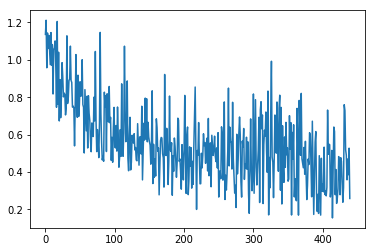

In [88]:
plot_loss(loss_history)

In [60]:
dataloader_train_eval = DataLoader(dataset_train.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)
dataloader_test_eval = DataLoader(dataset_test.change_strategy(get_pair=False), shuffle=0, num_workers=4, batch_size=64, drop_last=False)

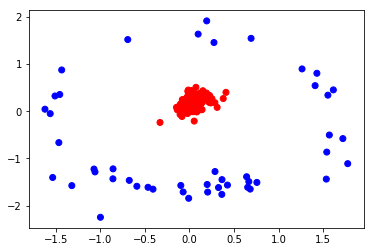

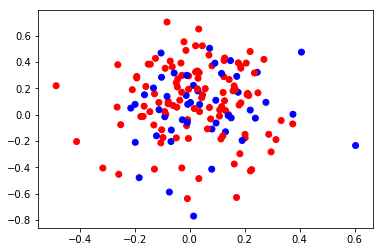

Accuracy: 0.5220125786163522
Precision: 0.08571428571428572
Recall: 0.06382978723404255
F1: 0.07317073170731707


In [83]:
eval_model(model, dataloader_train_eval, dataloader_test_eval)